# **1. Bacalah file csv ‘cars_sampled.csv’**

Ditampilkan sebagai berikut:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('cars_sampled.csv')
data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


#**2. Buatlah diagram batang yang menampilkan proporsi (dalam persen) dari gearbox yang digunakan untuk masing-masing jenis mobil. Sebagai contoh tampilan adalah sebagai gambar dibawah ini. Lengkapi grafik sesuai dengan keterangan-keterangan yang memadai. Anda juga bisa memodifikasi warna, tampilan sesuai dengan keinginan anda.**

Ditampilkan sebagai berikut:

In [ ]:
data_diagram=pd.crosstab(data.vehicleType, data.gearbox)
data_diagram['pct_automatic']=(data_diagram['automatic']/data_diagram.sum(axis=1))*100
data_diagram['pct_manual']=(data_diagram['manual']/data_diagram.sum(axis=1))*100
data_diagram

gearbox,automatic,manual,pct_automatic,pct_manual
vehicleType,,,,
bus,689,3181,17.803618,81.819976
cabrio,790,2154,26.834239,72.504887
coupe,787,1681,31.888169,67.243008
limousine,3409,9295,26.834068,73.011713
others,36,375,8.759124,89.336950
small car,854,9454,8.284827,91.641518
station wagon,2345,6429,26.726693,73.050786
suv,964,1000,49.083503,49.675038


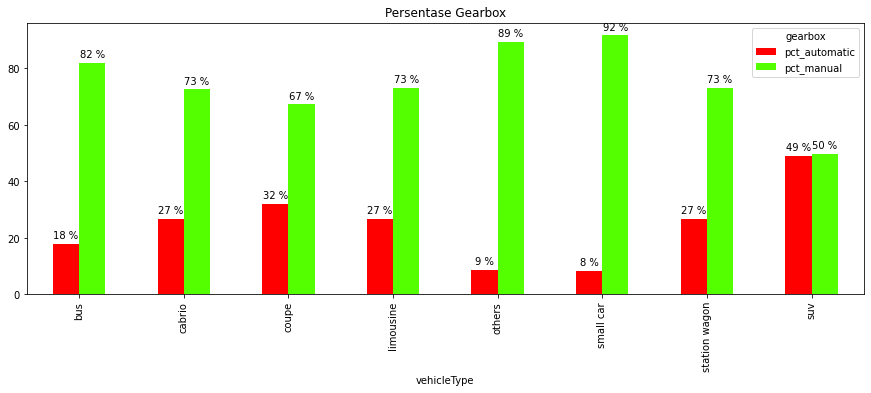

In [ ]:
data_diagram_fix=data_diagram.plot.bar(y=['pct_automatic','pct_manual'], figsize=(15,5), colormap='prism')
for p in data_diagram_fix.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    data_diagram_fix.text(x+width/2,
            y+height+3, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.title('Persentase Gearbox')    
plt.show()

# **3. Buatlah diagram boxplot yang menampilkan harga mobil jenis mobil kecil (‘small car’) pada masing-masing tahun. Filter data dengan ketentuan berikut: Harga lebih dari 0 dan kurang dari 35000, tahunnya antara 2007 sampai 2016. Lengkapi grafik sesuai dengan keterangan-keterangan yang memadai. Anda juga bisa memodifikasi warna, tampilan sesuai dengan keinginan anda.**

Ditampilkan sebagai berikut:

In [ ]:
data_boxplot=data[data['vehicleType']=='small car']
data_boxplot1=data_boxplot[data['yearOfRegistration']>=2007][data['yearOfRegistration']<=2016]
data_boxplot2=data_boxplot1[data['price']>0][data['price']<35000]
data_boxplot_fix=data_boxplot2[['vehicleType', 'yearOfRegistration','price']]
data_boxplot_fix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,vehicleType,yearOfRegistration,price
76,small car,2010,9450
80,small car,2009,3980
82,small car,2009,7300
97,small car,2009,4600
207,small car,2009,5100
...,...,...,...
49799,small car,2012,7500
49855,small car,2012,9999
49929,small car,2009,5900
49933,small car,2007,2600


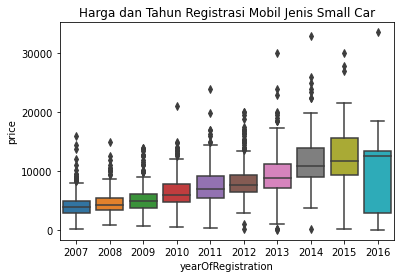

In [ ]:
sns.boxplot(x="yearOfRegistration", y="price", data=data_boxplot_fix)
plt.title('Harga dan Tahun Registrasi Mobil Jenis Small Car')
sns.set(rc={'figure.figsize':(8,5)}, font_scale=1.5, style='whitegrid')
plt.show()

# **4. Buatlah 2 plot bersampingan dengan ketentuan sebagai berikut: Filter data dengan ketentuan harga lebih dari 0 dan kurang dari 50000 , powerPS lebih dari 0 dan kurang dari 600, dan jenis mobil adalah suv . Kedua plot memiliki sumbu tegak berupa harga, sedangkan pada plot pertama sumbu mendatarnya adalah powerPS, sedangkan sumbu kedua menampilkan tahun registrasi mobil. Lengkapi grafik sesuai dengan keterangan-keterangan yang memadai. Anda juga bisa memodifikasi warna, tampilan sesuai dengan keinginan anda.**

Ditampilkan sebagai berikut:

In [ ]:
df = data
pd.DataFrame(df, columns=['powerPS', 'price', 'vehicleType', 'yearOfRegistration'])

,powerPS,price,vehicleType,yearOfRegistration
0,150,4450,limousine,2003
1,163,13299,suv,2005
2,101,3200,bus,2003
3,86,4500,small car,2006
4,185,18750,suv,2008
...,...,...,...,...
49996,0,0,bus,2005
49997,0,19999,NaN,1990
49998,0,0,coupe,2004
49999,0,100,station wagon,2000


In [ ]:
suv = df.iloc[:, :19][df.vehicleType == 'suv'][(df['price'] > 0) & (df['price']  < 50000)][(df['powerPS'] > 0) & (df['powerPS']  < 600)]
suv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
16,12/3/2016 21:52,Nissan_Terrano_II,private,offer,1300,test,suv,1993,manual,101,others,150000,10,diesel,nissan,yes,12/3/2016 0:00,49406,24/03/2016 23:17
42,22/03/2016 12:46,Land_Rover_Freelander_TD4_Aut._HSE,private,offer,19000,control,suv,2010,automatic,152,freelander,90000,5,diesel,land_rover,no,22/03/2016 0:00,85122,6/4/2016 1:16
70,2/4/2016 12:54,Jeep_Grand_Cherokee_3.0I_CRD,private,offer,22800,test,suv,2011,automatic,241,grand,150000,6,diesel,jeep,no,2/4/2016 0:00,58730,4/4/2016 10:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49919,22/03/2016 9:57,Hyundai_Terracan_2.9_l_Diesel,private,offer,2199,test,suv,2002,manual,150,others,150000,1,diesel,hyundai,NaN,22/03/2016 0:00,99510,3/4/2016 21:15
49931,2/4/2016 1:37,Land_Rover_Discovery_TD_V6,private,offer,11900,test,suv,2007,manual,190,discovery,150000,2,diesel,land_rover,no,2/4/2016 0:00,86633,2/4/2016 8:39
49932,31/03/2016 22:25,Honda_CR_V_2.2i_CTDi_DPF_Style,private,offer,12000,control,suv,2009,manual,140,cr_reihe,90000,8,diesel,honda,no,31/03/2016 0:00,65599,2/4/2016 16:29
49965,10/3/2016 10:51,Ford_Ford_Ranger_Pick_Up_4x2,private,offer,4000,test,suv,2000,manual,77,others,150000,2,diesel,ford,no,10/3/2016 0:00,89441,11/3/2016 11:15


In [ ]:
suv1 = pd.DataFrame(suv, columns=['powerPS', 'price', 'vehicleType', 'yearOfRegistration'])
suv1

,powerPS,price,vehicleType,yearOfRegistration
1,163,13299,suv,2005
4,185,18750,suv,2008
16,101,1300,suv,1993
42,152,19000,suv,2010
70,241,22800,suv,2011
...,...,...,...,...
49919,150,2199,suv,2002
49931,190,11900,suv,2007
49932,140,12000,suv,2009
49965,77,4000,suv,2000


(0.0, 50000.0)

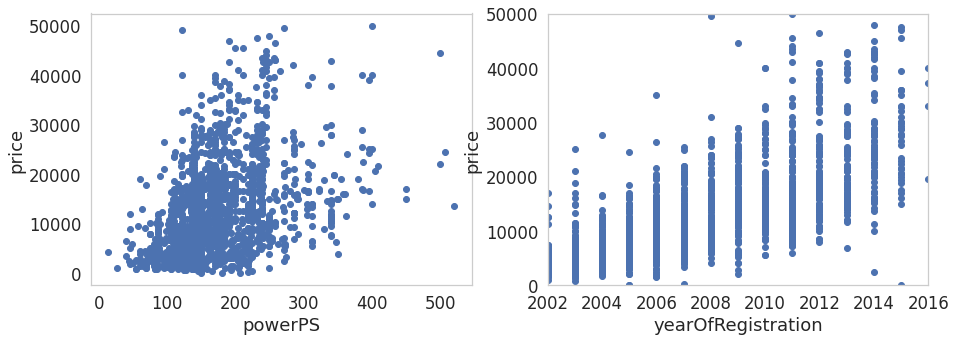

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
axes[0].scatter(suv1['powerPS'], suv1['price'])
axes[0].set_xlabel('powerPS')
axes[0].set_ylabel('price')
axes[0].grid()
plt.xlim(0, 500)
plt.ylim(0, 50000)

axes[1].scatter(suv1['yearOfRegistration'], suv1['price'])
axes[1].set_xlabel('yearOfRegistration')
axes[1].set_ylabel('price')
axes[1].grid()
plt.xlim(2002, 2016)
plt.ylim(0, 50000)

# **5. Buatlah satu plot pengolahan data dengan ketentuan (1) Bukan grafik seperti nomor 2,3,dan 4. (2) Menggunakan variabel yang menurut anda memiliki korelasi/keterkaitan dengan harga mobil. (3) Dilengkapi dengan keterangan grafik yang memadai.**

Ditampilkan sebagai berikut:

In [ ]:
dataframe = data
baru1 = pd.DataFrame(dataframe, columns=['seller', 'price', 'fuelType'])
baru1

,seller,price,fuelType
0,private,4450,diesel
1,private,13299,diesel
2,private,3200,diesel
3,private,4500,petrol
4,private,18750,diesel
...,...,...,...
49996,private,0,NaN
49997,private,19999,NaN
49998,private,0,petrol
49999,commercial,100,petrol


data menampilkan harga, jenis bensin dan penjualnya (secara komersial atau privat), kemudian akan dicari korelasinya dengan harga mobil

In [ ]:
baru2 = baru1.groupby(['seller', 'fuelType']).mean()
baru2

price
seller     fuelType              
commercial petrol      600.000000
private    cng        5167.825000
           diesel     8377.331568
           electro    7645.428571
           hybrid    14731.179487
           lpg        4375.521851
           other      4556.807692
           petrol     5782.787535

data menampilkan rata-rata harga setiap jenis bensin yang dijual secara komersial atau privat

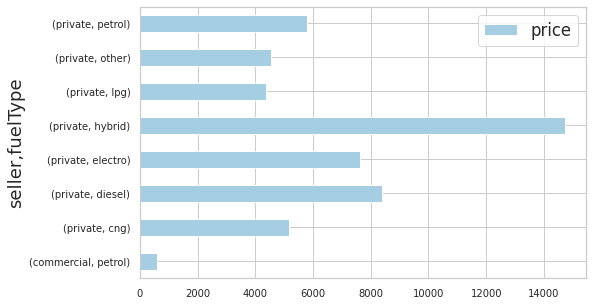

In [ ]:
baru2.plot(kind="barh", fontsize=10, colormap='Paired')

dibentuk grafik yang menampilkan jenis bensin dan penjualannya, dimana korelasinya dengan harga mobil disini adalah ketika ada yang ingin membeli suatu mobil dengan jenis bensin petrol, diesel, hybrid, dll maka dapat dilihat perbandingan harganya, jika ingin yang murah tinggal dicek saja antara komersial atau privat.